In [78]:
from lib.utils import *
# balance before split 0.9448556672867532

In [79]:
df = load_psd_list(range(0,32))
y = df.pop('label')
X = df.to_numpy()

In [80]:
X_win = []
y_win = []
for i in range(len(X)-4):
    X_win.append(X[i:i+5].flatten())
    y_win.append(y[i:i+5].mode()[0])
X_win = np.array(X_win)
y_win = np.array(y_win)

In [81]:
df_win = pd.concat([pd.DataFrame(y_win,columns=['label']),pd.DataFrame(X_win)],axis=1)

In [82]:
df_win = df_win[df_win['label'] != 'X']

In [83]:
y = df_win.pop('label')
X = df_win

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,random_state=0)

In [85]:
## Balance df_train
## Concatenate P Class
df_train = pd.concat([y_train,X_train],axis=1)
df_win_P = pd.DataFrame()
for i in range(9):
    df_win_P = pd.concat([df_win_P,df_train[df_train['label'] == 'P']])
df_win_S = df_train[df_train['label'] == 'S']
df_win_W = df_train[df_train['label'] == 'W']
df_train = pd.concat([df_win_P,df_win_S,df_win_W]).reset_index(drop=True)

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9014359605020437

In [93]:
confusion_matrix(y_test,y_pred)

array([[ 1614,   204,  1246],
       [   44, 22982,  1821],
       [  177,  1958, 25248]])

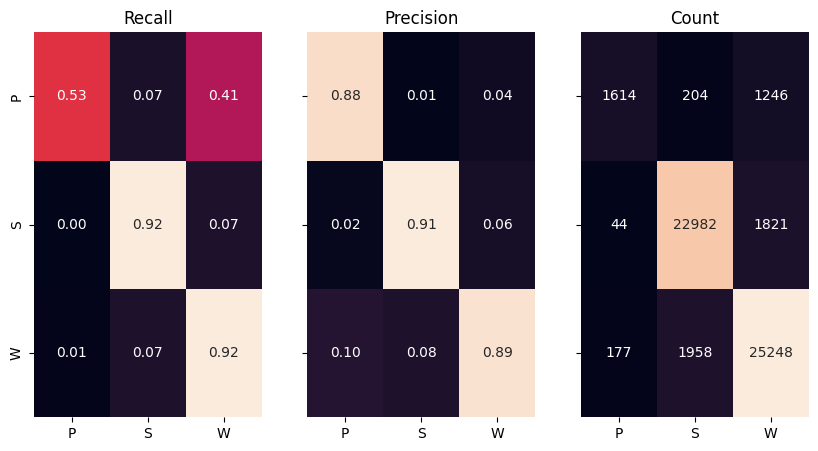

In [108]:
from sklearn.metrics import confusion_matrix
fig,axes = plt.subplots(1,3,sharey=True,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'),annot=True,ax=axes[0],cbar=False,fmt='.2f')
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='pred'),annot=True,ax=axes[1],cbar=False,fmt='.2f')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,ax=axes[2],cbar=False,fmt='d')
axes[0].set_title('Recall')
axes[1].set_title('Precision')
axes[2].set_title('Count')
axes[0].set_xticklabels(['P','S','W'])
axes[1].set_xticklabels(['P','S','W'])
axes[2].set_xticklabels(['P','S','W'])
axes[0].set_yticklabels(['P','S','W'])
plt.savefig('cm.jpg',dpi=200,bbox_inches='tight')